In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st


**Задание 1**

Загрузите файл HR.csv в pandas dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/control_group.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Задание 2**

Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
# Посмотрим на размеры датафрейма
df.shape

(14999, 10)

In [ ]:
# посмотрим информацию о наборе данных, включая имена всех столбцов и соответствующие им типы данных, а также количество непропущенных значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
#пропущенных значений нет, типы данных верные
#посмотрим основные статистики
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#посмотрим медиану для непрерывных величин

median_satisfaction_level = df['satisfaction_level'].median()
median_last_evaluation = df['last_evaluation'].median()
median_number_projects = df['number_project'].median()
median_average_montly_hours = df['average_montly_hours'].median()
median_time_spend_company = df['time_spend_company'].median()

print('satisfaction_level: ', median_satisfaction_level)
print('last_evaluation:', median_last_evaluation)
print('number_project: ', median_number_projects)
print('average_montly_hours: ', median_average_montly_hours)
print('time_spend_company: ', median_time_spend_company)

satisfaction_level:  0.64
last_evaluation: 0.72
number_project:  4.0
average_montly_hours:  200.0
time_spend_company:  3.0


In [ ]:
#посмотрим моду для категориальных величин

mode_Work_accident = df['Work_accident'].mode()
mode_left = df['left'].mode()
mode_promotion_last_5years = df['promotion_last_5years'].mode()
mode_department = df['department'].mode()
mode_salary = df['salary'].mode()

print('Work_accident:', mode_Work_accident[0])
print('left:', mode_left[0])
print('promotion_last_5years:', mode_promotion_last_5years[0])
print('department:', mode_department[0])
print('salary:', mode_salary[0])

Work_accident: 0
left: 0
promotion_last_5years: 0
department: sales
salary: low


**Задание 3**

Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [ ]:
#корреляционная матрица

df.corr()

<ipython-input-92-588b1e1d91ad>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<ipython-input-91-30605c7b2775>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray');


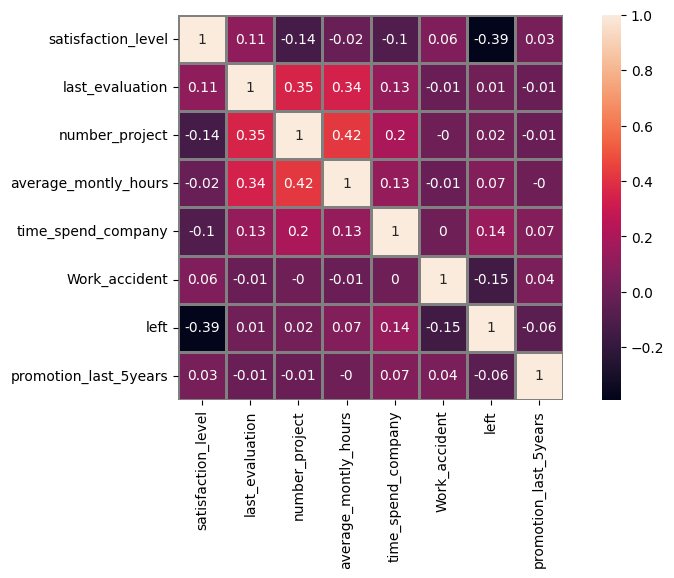

In [ ]:
#визуализируем с помощью тепловой карты

plt.figure(figsize=(10, 5))

sns.heatmap(df.corr().round(2), annot = True, square = True, linewidths=1, linecolor='gray');


две самые скоррелированные переменные:

number_projects и average_monthly_hours

left и satisfaction_level

две менее скоррелированные переменные:

work_accident и time_spend_company

average_monthly_hours и promotion_last_5years

**Задание 4**

Рассчитайте сколько сотрудников работает в каждом
департаменте

In [ ]:
#Рассчитайте сколько сотрудников работает в каждом департаменте

df.groupby('department')['department'].count()


department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

**Задание 5**

Показать распределение сотрудников по зарплатам

In [ ]:
#показать распределение сотрудников по зарплатам

df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

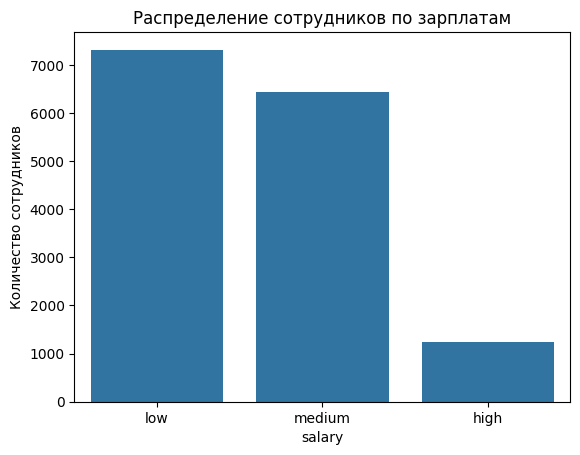

In [ ]:
sns.countplot(data=df, x="salary")
plt.title("Распределение сотрудников по зарплатам")
plt.ylabel("Количество сотрудников")
plt.show()

**Задание 6**

Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [ ]:
#Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

df_r = df.groupby([df['department'],df['salary']])[['salary']].count()

df_r.rename(columns = {'salary':'count_employer'}, inplace = True )

df_r.reset_index()


,department,salary,count_employer
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [ ]:
table_salary = pd.pivot_table(df_r, values='count_employer', index=['department'],
                       columns=['salary'], aggfunc="sum")

table_salary

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам в каждом департаменте по отдельности')

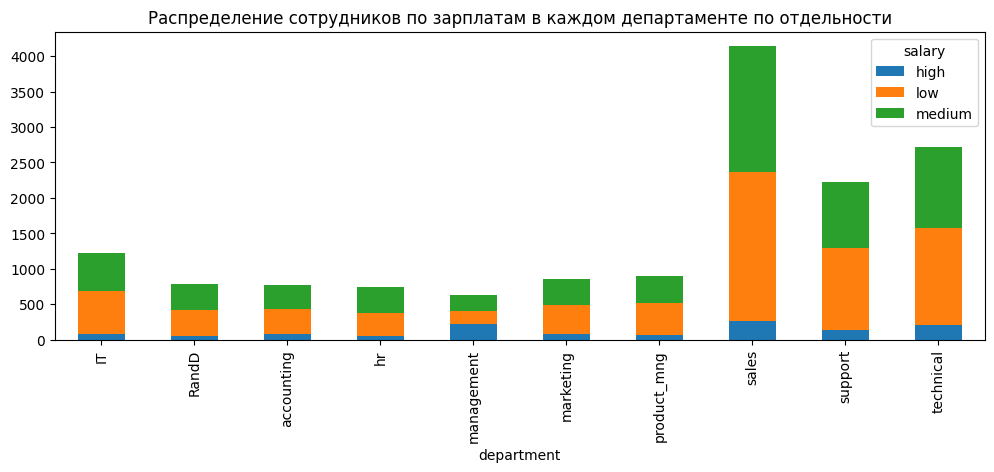

In [ ]:
table_salary.plot(kind='bar', stacked=True, figsize=(12, 4))
plt.title('Распределение сотрудников по зарплатам в каждом департаменте по отдельности')

**Задание 7**

Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

In [ ]:
df_low = df.loc[df['salary'] == 'low']['average_montly_hours']

df_high = df.loc[df['salary'] == 'high']['average_montly_hours']

df_low

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 7316, dtype: int64

In [ ]:
print(df_low.mean())
print(df_high.mean())

200.9965828321487
199.86742118027485


Text(0.5, 1.0, 'Сравнение распределений среднего количества часов на рабочем месте в месяц')

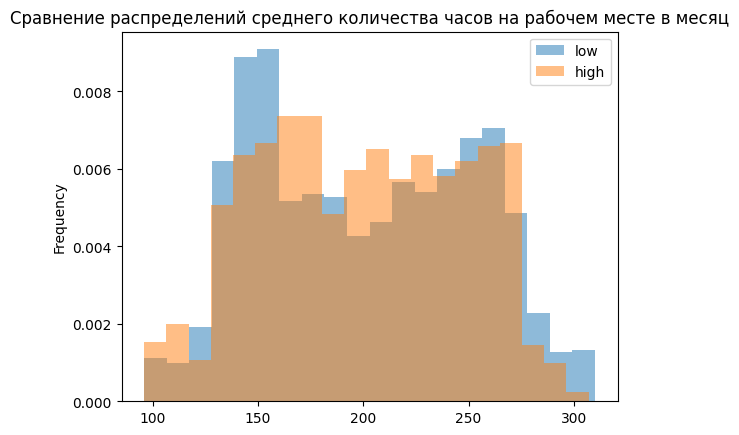

In [ ]:
df_low.plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density=True, label='low')


df_high.plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density=True, label='high')
plt.legend(loc='upper right')
plt.title('Сравнение распределений среднего количества часов на рабочем месте в месяц')

In [ ]:
#визуально видим, что распределение не нормальное, проверим с помощью теста Шапиро-Уилка
stat, p = st.shapiro(df_low)

print(f"Статистика = {stat:.3f}, p = {p:.40f}")

if p > 0.05:
    print('Вероятно нормальное распределение')
else:
        print('Вероятно не нормальное распределение')

Статистика = 0.960, p = 0.0000000000000000000000000000000000000001
Вероятно не нормальное распределение


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
stat, p = st.shapiro(df_high)

print(f"Статистика = {stat:.3f}, p = {p:.15f}")

if p > 0.05:
    print('Вероятно нормальное распределение')
else:
        print('Вероятно не нормальное распределение')

Статистика = 0.971, p = 0.000000000000006
Вероятно не нормальное распределение


In [ ]:
#т.к. распределение не нормальное, используем  Тест Манна-Уитни

stat, p = st.mannwhitneyu(df_low, df_high)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

#нулевая гипотеза: средние у двух выборок одинаковые

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различие между выборками статистически не значимо')
else:
    print('Отклоняем нулевую гипотезу, различие между выборками статистически значимо')



Статистика = 4542795.50000, p = 0.82413
Не отклоняем нулевую гипотезу, различие между выборками статистически не значимо


**Вывод:**  гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не подтвердилась, различие между средним временем на работе с высоким окладом и низким статистически не значимо.

**Задание 8**

Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет

- Средняя степень удовлетворенности

- Среднее количество проектов

In [ ]:
#Доля сотрудников с повышением за последние 5 лет среди уволившихся

df_left = df[df['left'] == 1]

df_left['promotion_last_5years'].mean()

#part_left = len(df_left[(df_left['promotion_last_5years'] == 1)]) / len(df_left)


0.005320638476617194

In [ ]:
#Доля сотрудников с повышением за последние 5 лет среди не уволившихся

df_no_left = df[df['left'] == 0]

df_no_left['promotion_last_5years'].mean()

#part_no_left = len(df_no_left[(df_no_left['promotion_last_5years'] == 1)]) / len(df_no_left)


0.026251312565628283

In [ ]:
#Средняя степень удовлетворенности среди уволившихся

df_left['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
#Средняя степень удовлетворенности среди не уволившихся

df_no_left['satisfaction_level'].mean()

0.666809590479524

In [ ]:
#Среднее количество проектов среди уволившихся

df_left['number_project'].mean()

3.8555026603192384

In [ ]:
#Среднее количество проектов среди не уволившихся

df_no_left['number_project'].mean()

3.786664333216661

**Задание 9**

Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)

Оценить качество модели на тестовой выборки

In [ ]:
X = df[['satisfaction_level', 'last_evaluation',
       'number_project', 'average_montly_hours',
        'time_spend_company', 'Work_accident',
        'promotion_last_5years']]

y = pd.array(df['left'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
3745,0,0
3746,1,0
3747,0,0
3748,0,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, lda.predict(X_test))

0.7536

**Вывод:** модель предсказывает верно в 75 % случаев